In [1]:
import warnings
from tqdm import TqdmWarning
warnings.filterwarnings("ignore", category=TqdmWarning)

import torch
from PIL import Image
from IPython.display import display
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration

In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
model = PaliGemmaForConditionalGeneration.from_pretrained("paligemma-3b-pt-224").to(DEVICE)
processor = AutoProcessor.from_pretrained("paligemma-3b-pt-224")

Loading checkpoint shards: 100%|██████████| 3/3 [00:00<00:00,  5.11it/s]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [3]:
prompt = "Where is the cat standing?"
image = "images\pipeline-cat-chonk.jpeg"
img = Image.open(image).convert("RGB")
model_inputs = processor(text=prompt, images=img, return_tensors="pt").to(DEVICE)

input_len = model_inputs["input_ids"].shape[-1]
generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
generation = generation[0][input_len:]
decoded = processor.decode(generation, skip_special_tokens=True)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


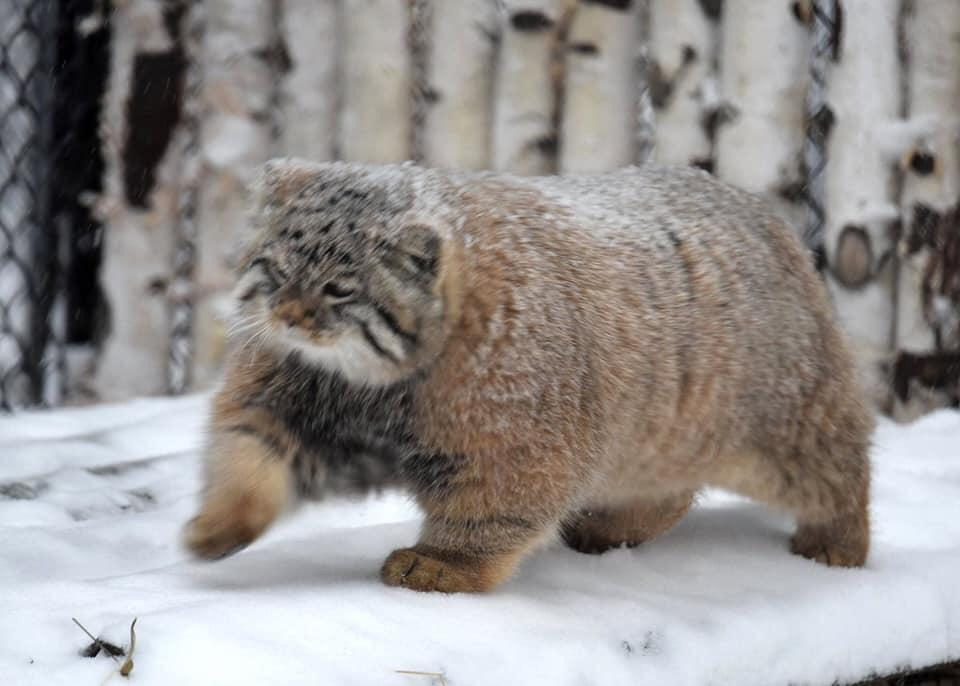

Where is the cat standing?
snow


In [4]:
display(img)
print(prompt)
print(decoded)